## 02427 Advanced Time Series Analysis
### Computer exercise 2

In [10]:
import numpy as np
import pandas as pd

from scipy.optimize import least_squares

from IPython.display import Markdown as md
import matplotlib.pyplot as plt

%matplotlib inline

Ensure reproducability

In [3]:
np.random.seed(seed=42)

### Part 1

Estimate the parameters in at least one of the systems generating the time
series that you simulated in part 1 of computer exercise 1. Use the prediction
error method (also refered to as the conditional least squares method) for
the estimation.

We load the data generated for the $\text{SETAR}(2, 1, 1)$ model in computer excercise 1:

In [13]:
dat = np.load('../ex1/setar_2_1_1.npy')
x = dat[:,0]
r = dat[:,1]
y_setar = dat[:,2]

For convenience we plot the time series: 

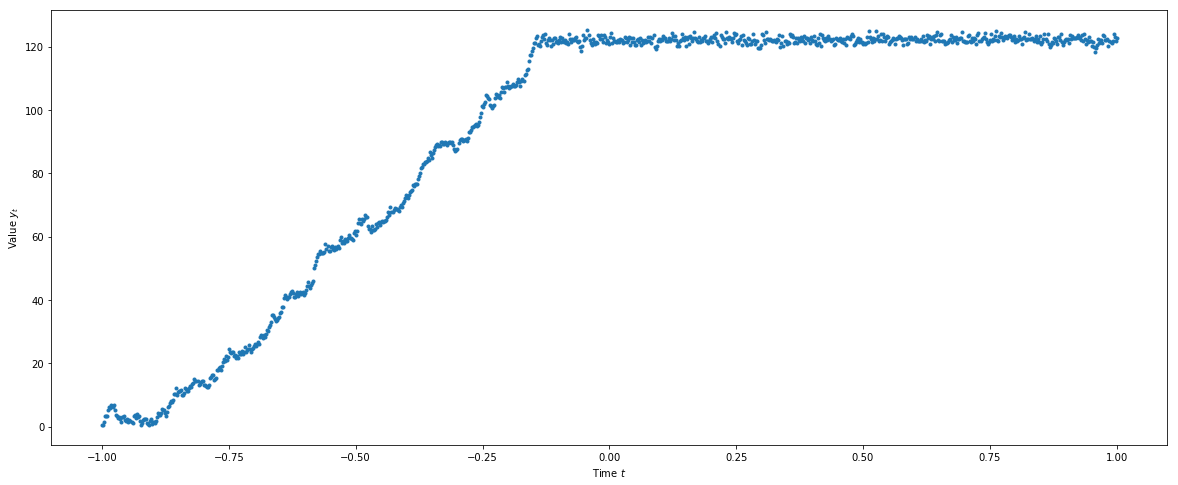

In [6]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.set_xlabel(r'Time $t$')
ax.set_ylabel(r'Value $y_t$')
ax.plot(x, y_setar, marker = '.', linestyle = '')
None

We start by define our $\text{SETAR}(2, 1, 1)$ model such that the slope coefficients of each regime are paramized using $\theta_0$ and $\theta_1$.

In [68]:
def setar_slope(theta, x, r):
    assert len(x) == len(r)
    y = np.empty_like(r)
    y[0] = r[0]
    for t in range(1, len(x)):
        if y[t-1] < 120:
            y[t] = .25 + theta[0] * y[t-1] + r[t]
        else:
            y[t] = 110 + theta[1] * y[t-1] + r[t]
    return  y

We define our residual function taking all the parameters of the above $\text{SETAR}$ function, as well as the true $y$ values.

In [69]:
def residuals_slope(theta, x, r, y):
    return setar_slope(theta, x, r) - y

Our initial guess is that both values are 0.

In [44]:
theta_init = [0, 0]

In [70]:
res = least_squares(residuals_slope, theta_init, args=(x, r, y_setar), verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.0714e+06                                    2.56e+04    
       1              2         2.7562e+04      5.04e+06       1.00e+00       1.34e+07    
       2              3         5.5658e+03      2.20e+04       7.61e-02       5.19e+06    
       3              4         3.4272e+02      5.22e+03       3.11e-02       5.58e+05    
       4              5         5.1399e-01      3.42e+02       7.47e-03       3.30e+03    
       5              6         6.1472e-08      5.14e-01       3.12e-04       1.14e+00    
       6              7         1.1366e-21      6.15e-08       1.08e-07       1.55e-07    
       7              8         0.0000e+00      1.14e-21       1.47e-14       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 8, initial cost 5.0714e+06, final cost 0.0000e+00, first-order optimality 0.00e+00.


We see the least squares optimization algorithm quickly finds the optimal values:

In [57]:
md(r'$\theta_0$ = {}, $\theta_1$ = {}'.format(*res.x))

$\theta_0$ = 1.0, $\theta_1$ = 0.1

Now we try to estimate the regime change parameter :

In [71]:
def setar_z(theta, x, r):
    assert len(x) == len(r)
    y = np.empty_like(r)
    y[0] = r[0]
    for t in range(1, len(x)):
        if y[t-1] < theta[0]:
            y[t] = .25 + theta[1] * y[t-1] + r[t]
        else:
            y[t] = 110 + .1 * y[t-1] + r[t]
    return  y

In [72]:
def residuals_z(theta, x, r, y):
    return setar_z(theta, x, r) - y

In [73]:
res = least_squares(residuals_z, theta_init, args=(x, r, y_setar), verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3645e+06                                    0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 1.3645e+06, final cost 1.3645e+06, first-order optimality 0.00e+00.


In [74]:
md(r'$\theta_0$ = {}, $\theta_1$ = {}'.format(*res.x))

$\theta_0$ = 0.0, $\theta_1$ = 0.0

### Part 2

In [119]:
def grid_slope(a, b):
    ps_0 = np.linspace(0, 2, 21)
    ps_1 = np.linspace(0, .2, 21)
    grid = np.empty([len(ps_0), len(ps_1)])
    for i in range(len(ps_0)):
        for k in range(len(ps_1)):
            p_0 = ps_0[i]
            p_1 = ps_1[k]
            grid[k, i] = np.mean(residuals_slope([p_0, p_1], x[a:b], r[a:b], y_setar[a:b])**2)
    return grid

**TODO** Fix the tick labels on these plots

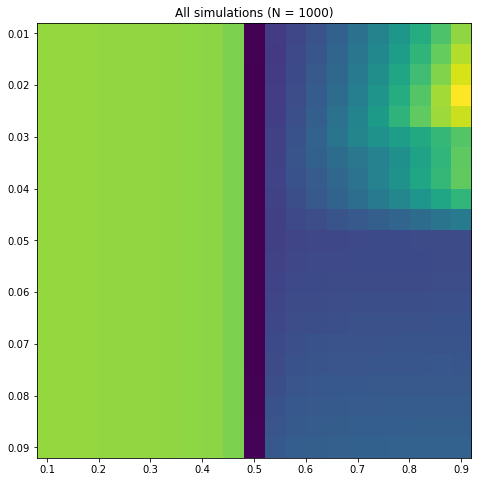

In [125]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title('All simulations (N = 1000)')
ax.set_xticklabels(ps_0)
ax.set_yticklabels(ps_1)
ax.imshow(grid_slope(0, 1000))

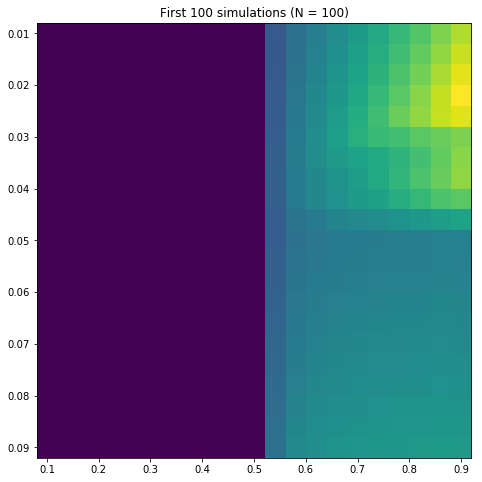

In [126]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title('First 100 simulations (N = 100)')
ax.set_xticklabels(ps_0)
ax.set_yticklabels(ps_1)
ax.imshow(grid_slope(0, 100))

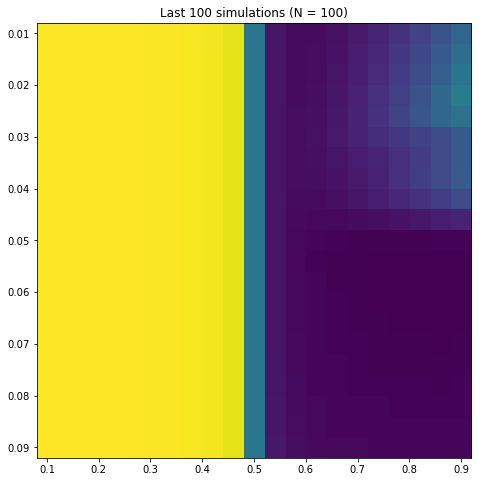

In [127]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title('Last 100 simulations (N = 100)')
ax.set_xticklabels(ps_0)
ax.set_yticklabels(ps_1)
ax.imshow(grid_slope(500, 1000))

**TODO**: Discuss your findings in the report.

### Part 3

We choose a Hidden Markov Model:

### Part 4

In [ ]:
We consider the following 

$
\begin{align}
    x_{t+1} &= a x_t + v_t \\
    y_{t} &= x_{t} + e_t \\
\end{align}
$


#### Simulation A

In [130]:
param_a = {
    'a': 0.4,
    'var_v': 1,
    'var_e': 1
}

In [147]:
np.random.seed(seed=42)

N = 1000
t = np.arange(N)
v = np.random.randn(N) * np.sqrt(param_a['var_v'])
e = np.random.randn(N) * np.sqrt(param_a['var_e'])
x = np.empty(N)
x[0] = v[0]
x[1:] = x[:-1] * param_a['a'] + v[1:]
y = x + e

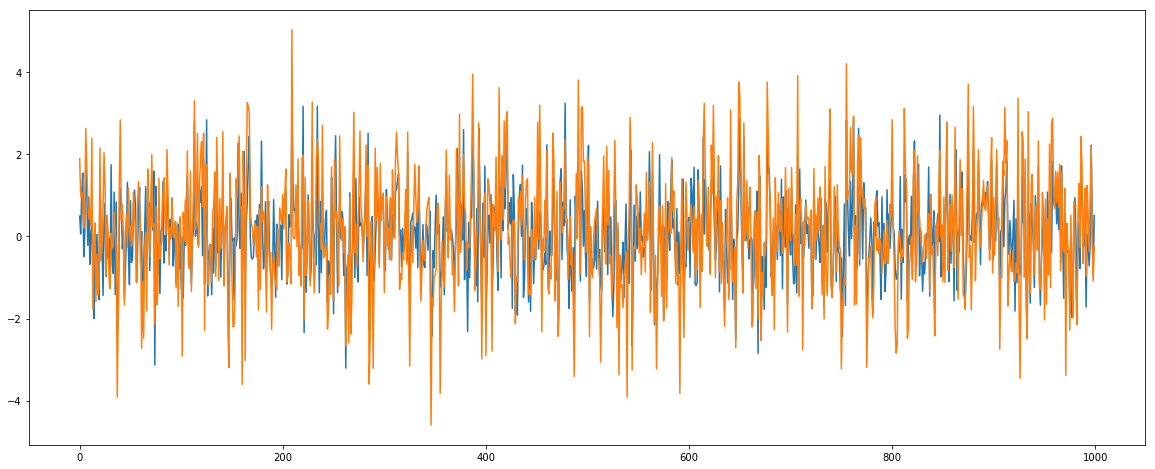

In [148]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(x)
ax.plot(y)